<a href="https://colab.research.google.com/github/pauarmentaa/EVALUACION/blob/main/EVALUACION_CALIFORNIA_EUA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **ARCHIVO 1: California_EUA**

TOTAL DE DATOS: 6936

In [ ]:
df= pd.read_csv("California_EUA.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958.0,https://www.airbnb.com/rooms/958,2.020000e+13,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,...,4.88,4.98,4.76,City Registration Pending,f,1,1,0,0,2.31
1,5858.0,https://www.airbnb.com/rooms/5858,2.020000e+13,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,...,4.85,4.77,4.68,NaN,f,1,1,0,0,0.66
2,8142.0,https://www.airbnb.com/rooms/8142,2.020000e+13,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,21994,...,4.78,4.67,4.67,NaN,f,13,0,13,0,0.09
3,8339.0,https://www.airbnb.com/rooms/8339,2.020000e+13,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,24215,...,5.00,4.94,4.75,STR-0000264,f,2,2,0,0,0.17
4,8739.0,https://www.airbnb.com/rooms/8739,2.020000e+13,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,7149,...,4.96,4.93,4.74,STR-0000028,f,2,0,2,0,4.65


In [ ]:
columnas = df.columns
print(columnas)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6936 non-null   float64
 1   listing_url                                   6936 non-null   object 
 2   scrape_id                                     6936 non-null   float64
 3   last_scraped                                  6936 non-null   object 
 4   source                                        6936 non-null   object 
 5   name                                          6936 non-null   object 
 6   description                                   6889 non-null   object 
 7   neighborhood_overview                         4850 non-null   object 
 8   picture_url                                   6936 non-null   object 
 9   host_id                                       6936 non-null   i

In [ ]:
#Identificar valores nulos por columna
valores_nulos=df.isnull().sum()
valores_nulos

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1325
Length: 75, dtype: int64

## **ETAPA 1: Preprocesamiento de DATOS**

### 1. Aplicar métodos para reemplazar valores nulos y justificar el método aplicado para cada columna o dataframe

Columnas con **NULOS a eliminar**, decidi eliminarlas debido a que como no tienen ningun tipo de información, considero que es lo mejor.
ELIMINAR: neighbourhood_group_cleansed, bathrooms , calendar_updated 

In [ ]:
data2 = df.drop(["neighbourhood_group_cleansed", "bathrooms", "calendar_updated"], axis=1)

Columnas con **NULOS que decidí cambiar a STRING**, esto debido a que por la naturaleza de los datos considero que es mejor ponerlo como "sin información".

STRING: description, neighborhood_overview, host_location, host_about, host_response_time, host_neighbourhood, neighbourhood, bathrooms_text, first_review, last_review, license


In [ ]:
#Sustituir valores nulos por un string en concreto
data2["description"] = data2["description"].fillna("sin informacion")
data2["neighborhood_overview"] = data2["neighborhood_overview"].fillna("sin informacion")
data2["host_location"] = data2["host_location"].fillna("sin informacion")
data2["host_about"] = data2["host_about"].fillna("sin informacion")
data2["host_response_time"] = data2["host_response_time"].fillna("sin informacion")
data2["host_neighbourhood"] = data2["host_neighbourhood"].fillna("sin informacion")
data2["neighbourhood"] = data2["neighbourhood"].fillna("sin informacion")
data2["bathrooms_text"] = data2["bathrooms_text"].fillna("sin informacion")
data2["first_review"] = data2["first_review"].fillna("sin informacion")
data2["last_review"] = data2["last_review"].fillna("sin informacion")
data2["license"] = data2["license"].fillna("sin informacion")

Columnas con **NULOS que cambie por MEDIA**, debido a la naturaleza de sus datos ( númericos o cuantitaticos) y por el nombre de sus columnas opté porque sea mejor poner la media de esas columnas para sustituir los nulos. Como primer paso las columnas de host_response_rate, host_acceptance_rate que estaban en object las pase a float64 para que se pudiera realizar el procedimiento. 

MEDIA: host_response_rate, host_acceptance_rate, bedrooms, beds, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value

In [ ]:
#CONVERSION DE TIPO DE DATO DE COLUMNA A TIPO OBJECT A FLOAT 
data2["host_response_rate"] = data2["host_response_rate"].str.replace('%', '').astype(float)
data2["host_acceptance_rate"] = data2["host_acceptance_rate"].str.replace('%', '').astype(float)

In [ ]:
data2["host_response_rate"] = data2["host_response_rate"].fillna(data2["host_response_rate"].mean())
data2["host_acceptance_rate"] = data2["host_acceptance_rate"].fillna(data2["host_acceptance_rate"].mean())
data2["bedrooms"] = data2["bedrooms"].fillna(data2["bedrooms"].mean())
data2["beds"] = data2["beds"].fillna(data2["beds"].mean())
data2["minimum_minimum_nights"] = data2["minimum_minimum_nights"].fillna(data2["minimum_minimum_nights"].mean())
data2["maximum_minimum_nights"] = data2["maximum_minimum_nights"].fillna(data2["maximum_minimum_nights"].mean())
data2["minimum_maximum_nights"] = data2["minimum_maximum_nights"].fillna(data2["minimum_maximum_nights"].mean())
data2["maximum_maximum_nights"] = data2["maximum_maximum_nights"].fillna(data2["maximum_maximum_nights"].mean())
data2["review_scores_rating"] = data2["review_scores_rating"].fillna(data2["review_scores_rating"].mean())
data2["review_scores_accuracy"] = data2["review_scores_accuracy"].fillna(data2["review_scores_accuracy"].mean())
data2["review_scores_cleanliness"] = data2["review_scores_cleanliness"].fillna(data2["review_scores_cleanliness"].mean())
data2["review_scores_checkin"] = data2["review_scores_checkin"].fillna(data2["review_scores_checkin"].mean())
data2["review_scores_communication"] = data2["review_scores_communication"].fillna(data2["review_scores_communication"].mean())
data2["review_scores_location"] = data2["review_scores_location"].fillna(data2["review_scores_location"].mean())
data2["review_scores_value"] = data2["review_scores_value"].fillna(data2["review_scores_value"].mean())

Cambiar **NULOS por BACKWARDFILL**, creo que en esta columna fue lo mejor ya que la naturaleza de estos datos era t (true) y f (false) por lo que considere que  una opción podría ser utilizar la técnica de backwardfill para reemplazar los valores nulos con el valor del último valor no nulo en la columna. De esta manera, los valores faltantes se llenarán con la última respuesta verdadera o falsa que se haya registrado.

BACKWARDFILL: host_is_superhost



In [ ]:
data2["host_is_superhost"] = data2["host_is_superhost"].fillna(method="bfill")

Cambiar **NULOS por MEDIANA** , en esta parte opté por cambiar los nulos por la mediana ya que estas columnas ya contienen el promedio, es por ello que opté que fuera la mediana(ya que es una medida robusta que no se ve afectada por valores extremos o atípicos) ya que si no sería el promedio del promedio lo que no me parecio tan buena idea .

MEDIANA: minimum_nights_avg_ntm, maximum_nights_avg_ntm, reviews_per_month

In [ ]:
data2["minimum_nights_avg_ntm"] = data2["minimum_nights_avg_ntm"].fillna(data2["minimum_nights_avg_ntm"].median())
data2["maximum_nights_avg_ntm"] = data2["maximum_nights_avg_ntm"].fillna(data2["maximum_nights_avg_ntm"].median())
data2["reviews_per_month"] = data2["reviews_per_month"].fillna(data2["reviews_per_month"].median())

In [ ]:
#Corroboramos NULOS
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6936 non-null   float64
 1   listing_url                                   6936 non-null   object 
 2   scrape_id                                     6936 non-null   float64
 3   last_scraped                                  6936 non-null   object 
 4   source                                        6936 non-null   object 
 5   name                                          6936 non-null   object 
 6   description                                   6936 non-null   object 
 7   neighborhood_overview                         6936 non-null   object 
 8   picture_url                                   6936 non-null   object 
 9   host_id                                       6936 non-null   i

In [ ]:
#Identificar valores nulos por columna
valores_nulos=data2.isnull().sum()
valores_nulos

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 72, dtype: int64

## Aplicar métodos (Desviación Estándar o Rango Intercuartílico) para eliminar Outliers de cada dataframe y justificar el método aplicado

**Ocuparé Rango Intercuartílico** ya que la distribución de los datos no necesariamente es normal y puede contener valores atípicos que afecten a la media y desviación estándar. El método del IQR es más robusto y se basa en la mediana y el rango intercuartílico para identificar los valores atípicos.

In [ ]:
#SEPARAMOS LAS COLUMNAS CUANTITATIVAS DEL DATA2
import pandas as pd
# Verificar los tipos de datos de cada columna
print(data2.dtypes)
# Seleccionar las variables numéricas
data_num = data2.select_dtypes(include="number")
# Mostrar el DataFrame resultante
print(data_num)

In [ ]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6936 non-null   float64
 1   scrape_id                                     6936 non-null   float64
 2   host_id                                       6936 non-null   int64  
 3   host_response_rate                            6936 non-null   float64
 4   host_acceptance_rate                          6936 non-null   float64
 5   host_listings_count                           6936 non-null   int64  
 6   host_total_listings_count                     6936 non-null   int64  
 7   latitude                                      6936 non-null   float64
 8   longitude                                     6936 non-null   float64
 9   accommodates                                  6936 non-null   i

In [ ]:
data_num.head()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958.0,2.020000e+13,1169,100.0,100.0,1,1,37.77028,-122.43317,3,...,4.92,4.95,4.88,4.98,4.76,1,1,0,0,2.31
1,5858.0,2.020000e+13,8904,80.0,71.0,2,2,37.74474,-122.42089,4,...,4.87,4.89,4.85,4.77,4.68,1,1,0,0,0.66
2,8142.0,2.020000e+13,21994,100.0,73.0,13,14,37.76555,-122.45213,1,...,4.44,4.78,4.78,4.67,4.67,13,0,13,0,0.09
3,8339.0,2.020000e+13,24215,100.0,0.0,2,6,37.77564,-122.43642,4,...,5.00,4.94,5.00,4.94,4.75,2,2,0,0,0.17
4,8739.0,2.020000e+13,7149,100.0,90.0,2,2,37.76030,-122.42197,3,...,4.94,4.95,4.96,4.93,4.74,2,0,2,0,4.65


In [ ]:
data_num2=data_num.copy()

<Figure size 1500x800 with 0 Axes>

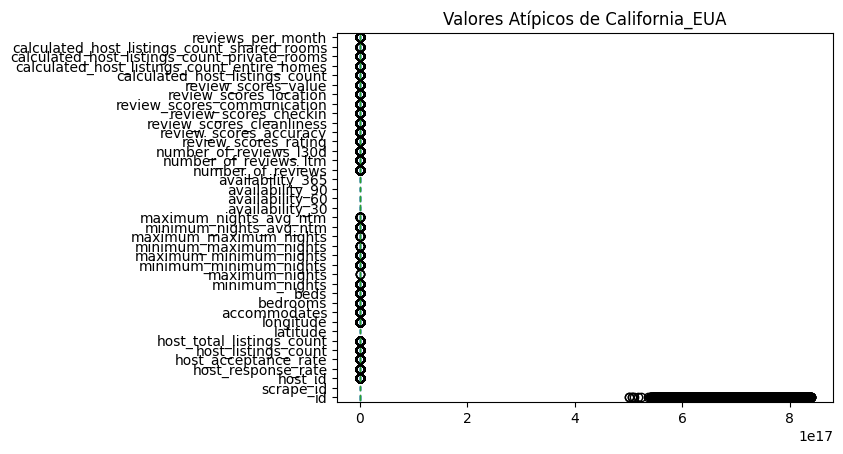

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
data_num2.plot(kind='box', vert=False)
plt.title("Valores Atípicos de California_EUA")
plt.show() #dibujamos el diagrama

In [ ]:
#Encuentro cuartiles 0.25 y 0.75
y=data_num2

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)

Limite superior permitido id                                              1.067459e+08
scrape_id                                       2.020000e+13
host_id                                         4.243084e+08
host_response_rate                              1.065387e+02
host_acceptance_rate                            1.179892e+02
host_listings_count                             3.850000e+01
host_total_listings_count                       5.700000e+01
latitude                                        3.783859e+01
longitude                                      -1.223622e+02
accommodates                                    7.000000e+00
bedrooms                                        3.500000e+00
beds                                            3.500000e+00
minimum_nights                                  7.200000e+01
maximum_nights                                  2.769000e+03
minimum_minimum_nights                          7.200000e+01
maximum_minimum_nights                          7.200000e+0

In [ ]:
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite inferior permitido id                                             -3.562532e+07
scrape_id                                       2.020000e+13
host_id                                        -2.452959e+08
host_response_rate                              8.910216e+01
host_acceptance_rate                            7.001793e+01
host_listings_count                            -2.150000e+01
host_total_listings_count                      -3.100000e+01
latitude                                        3.770181e+01
longitude                                      -1.224912e+02
accommodates                                   -1.000000e+00
bedrooms                                       -5.000000e-01
beds                                           -5.000000e-01
minimum_nights                                 -4.000000e+01
maximum_nights                                 -1.615000e+03
minimum_minimum_nights                         -4.000000e+01
maximum_minimum_nights                         -4.000000e+0

In [ ]:
#Encontramos Outliers del Dataframe
outliers_EUA= data_num2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_EUA

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN
3,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,8.180000e+17,NaN,495900269.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6932,8.180000e+17,NaN,499392537.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6933,8.180000e+17,NaN,499294716.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6934,8.180000e+17,NaN,485596413.0,NaN,50.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Obtenemos datos limpios del Dataframe
data3= data_num2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958.0,2.020000e+13,1169.0,100.000000,100.000000,1.0,1.0,37.770280,-122.433170,3.0,...,4.920000,4.950000,4.880000,4.980000,4.760000,1.0,1.0,0.0,0.0,2.31
1,5858.0,2.020000e+13,8904.0,NaN,71.000000,2.0,2.0,37.744740,-122.420890,4.0,...,4.870000,4.890000,4.850000,4.770000,4.680000,1.0,1.0,0.0,0.0,0.66
2,8142.0,2.020000e+13,21994.0,100.000000,73.000000,13.0,14.0,37.765550,-122.452130,1.0,...,4.440000,4.780000,4.780000,4.670000,4.670000,13.0,0.0,NaN,0.0,0.09
3,8339.0,2.020000e+13,24215.0,100.000000,NaN,2.0,6.0,37.775640,-122.436420,4.0,...,5.000000,4.940000,5.000000,4.940000,4.750000,2.0,2.0,0.0,0.0,0.17
4,8739.0,2.020000e+13,7149.0,100.000000,90.000000,2.0,2.0,37.760300,-122.421970,3.0,...,4.940000,4.950000,4.960000,4.930000,4.740000,2.0,0.0,2.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,NaN,2.020000e+13,NaN,100.000000,100.000000,9.0,9.0,37.791994,-122.410000,2.0,...,4.767581,4.879061,4.854186,4.786647,4.663201,5.0,5.0,0.0,0.0,0.56
6932,NaN,2.020000e+13,NaN,95.640865,88.007172,1.0,1.0,37.763060,-122.432023,2.0,...,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,1.0,0.0,0.0,1.00
6933,NaN,2.020000e+13,NaN,95.640865,88.007172,1.0,1.0,37.777633,-122.416478,1.0,...,4.767581,4.879061,4.854186,4.786647,4.663201,1.0,0.0,1.0,0.0,0.56
6934,NaN,2.020000e+13,NaN,100.000000,NaN,3.0,4.0,37.738325,-122.396603,2.0,...,4.767581,4.879061,4.854186,4.786647,4.663201,3.0,0.0,3.0,0.0,0.56


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3.isnull().sum()
valores_nulos

id                                              1573
scrape_id                                          0
host_id                                          413
host_response_rate                               554
host_acceptance_rate                             791
host_listings_count                             1128
host_total_listings_count                       1196
latitude                                           0
longitude                                        327
accommodates                                     279
bedrooms                                         228
beds                                             558
minimum_nights                                   200
maximum_nights                                     4
minimum_minimum_nights                           231
maximum_minimum_nights                           346
minimum_maximum_nights                            21
maximum_maximum_nights                            36
minimum_nights_avg_ntm                        

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4=data3.copy()
data4=data4.fillna(round(data3.mean(),1))
data4

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958.0,2.020000e+13,1169.0,100.000000,100.000000,1.0,1.0,37.770280,-122.433170,3.0,...,4.920000,4.950000,4.880000,4.980000,4.760000,1.0,1.0,0.0,0.0,2.31
1,5858.0,2.020000e+13,8904.0,98.800000,71.000000,2.0,2.0,37.744740,-122.420890,4.0,...,4.870000,4.890000,4.850000,4.770000,4.680000,1.0,1.0,0.0,0.0,0.66
2,8142.0,2.020000e+13,21994.0,100.000000,73.000000,13.0,14.0,37.765550,-122.452130,1.0,...,4.440000,4.780000,4.780000,4.670000,4.670000,13.0,0.0,0.7,0.0,0.09
3,8339.0,2.020000e+13,24215.0,100.000000,93.900000,2.0,6.0,37.775640,-122.436420,4.0,...,5.000000,4.940000,5.000000,4.940000,4.750000,2.0,2.0,0.0,0.0,0.17
4,8739.0,2.020000e+13,7149.0,100.000000,90.000000,2.0,2.0,37.760300,-122.421970,3.0,...,4.940000,4.950000,4.960000,4.930000,4.740000,2.0,0.0,2.0,0.0,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,27790615.3,2.020000e+13,87507815.4,100.000000,100.000000,9.0,9.0,37.791994,-122.410000,2.0,...,4.767581,4.879061,4.854186,4.786647,4.663201,5.0,5.0,0.0,0.0,0.56
6932,27790615.3,2.020000e+13,87507815.4,95.640865,88.007172,1.0,1.0,37.763060,-122.432023,2.0,...,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,1.0,0.0,0.0,1.00
6933,27790615.3,2.020000e+13,87507815.4,95.640865,88.007172,1.0,1.0,37.777633,-122.416478,1.0,...,4.767581,4.879061,4.854186,4.786647,4.663201,1.0,0.0,1.0,0.0,0.56
6934,27790615.3,2.020000e+13,87507815.4,100.000000,93.900000,3.0,4.0,37.738325,-122.396603,2.0,...,4.767581,4.879061,4.854186,4.786647,4.663201,3.0,0.0,3.0,0.0,0.56


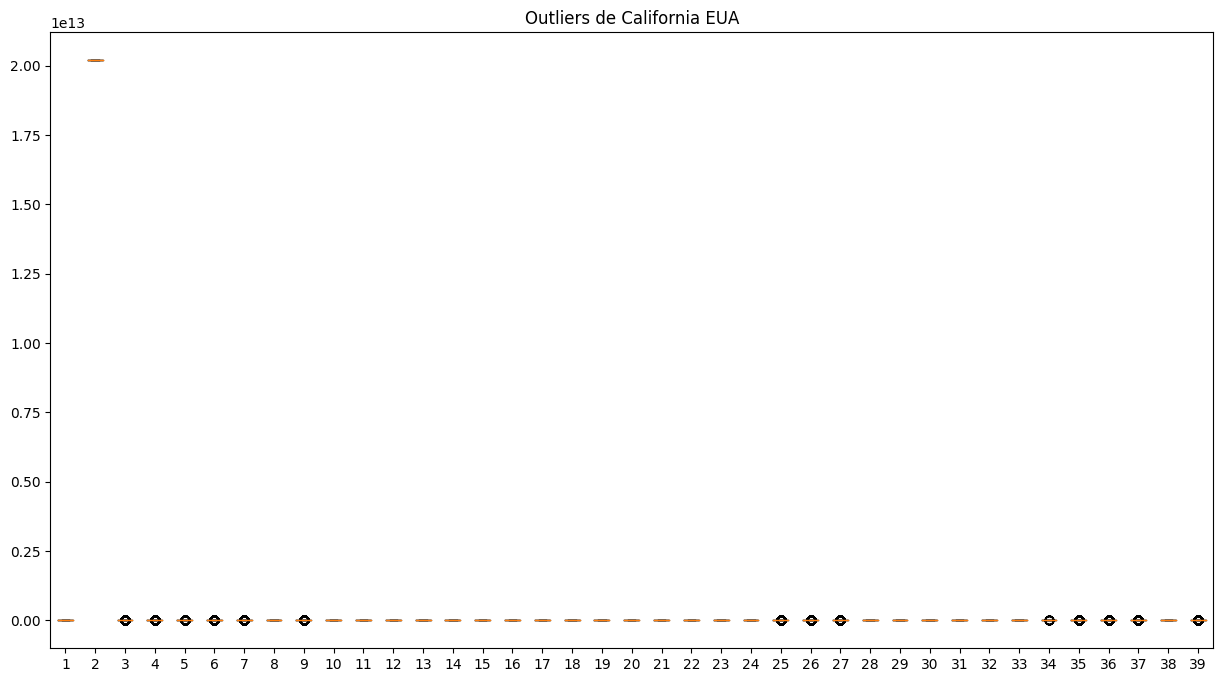

In [ ]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(15, 8))
plt.boxplot(data4) 
plt.title("Outliers de California EUA")
plt.show() #dibujamos el diagrama

In [ ]:
data2.select_dtypes(include=['object'])

In [ ]:
cuali = data2.select_dtypes(include=['object'])
Datos_limpios_EUA = pd.concat([cuali, data4], axis=1)
Datos_limpios_EUA.head()

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,Holly,31/07/2008,...,4.92,4.95,4.88,4.98,4.76,1.0,1.0,0.0,0.0,2.31
1,https://www.airbnb.com/rooms/5858,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,https://www.airbnb.com/users/show/8904,Philip And Tania,02/03/2009,...,4.87,4.89,4.85,4.77,4.68,1.0,1.0,0.0,0.0,0.66
2,https://www.airbnb.com/rooms/8142,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,https://www.airbnb.com/users/show/21994,Aaron,17/06/2009,...,4.44,4.78,4.78,4.67,4.67,13.0,0.0,0.7,0.0,0.09
3,https://www.airbnb.com/rooms/8339,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,sin informacion,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/24215,Rosy,02/07/2009,...,5.00,4.94,5.00,4.94,4.75,2.0,2.0,0.0,0.0,0.17
4,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,https://www.airbnb.com/users/show/7149,Ivan & Wendy,27/01/2009,...,4.94,4.95,4.96,4.93,4.74,2.0,0.0,2.0,0.0,0.70


## **ETAPA 2: Extracción  de DATOS**

a) host_acceptance_rate> 50%

Aqui decidi multiplicar esa columna por 100, ya que en el csv o excel estan en % pero en excel aparecen por ejemplo como 0.71, entonces al multiplicarlo por 100 seria 71, y posteriomente que solo se quedara con los mayor a 50.

In [127]:
host_acceptance_rate=Datos_limpios_EUA[Datos_limpios_EUA['host_acceptance_rate']*100 > 50]

Sólo los registros con categoría “superhost”

In [ ]:
superhost = Datos_limpios_EUA[Datos_limpios_EUA['host_is_superhost'] == 't']

Los registros que no hallan verificado identidad “not identity_verified”

In [ ]:
identity_verified= Datos_limpios_EUA[Datos_limpios_EUA['host_identity_verified'] == 'f']

Los registro cuyo property_type = “Private room” y “Hotel room”

In [ ]:
property_type=Datos_limpios_EUA[Datos_limpios_EUA['property_type'].isin(['Private room', 'Hotel room'])]

Los registros que cuenten con bathroom > 1

In [ ]:
print(Datos_limpios_EUA['bathrooms_text'].value_counts())

1 bath               3329
1 private bath       1013
2 baths               844
1 shared bath         675
1.5 baths             290
1.5 shared baths      141
2.5 baths             128
3 baths               122
2 shared baths         85
5 shared baths         63
3.5 baths              36
0 shared baths         25
4 baths                23
3 shared baths         22
0 baths                21
5 baths                19
4 shared baths         18
2.5 shared baths       15
sin informacion        14
4.5 baths              12
3.5 shared baths        9
Shared half-bath        8
6 shared baths          6
Private half-bath       4
Half-bath               3
8 shared baths          2
6.5 shared baths        2
5.5 baths               2
10 baths                1
10 shared baths         1
6.5 baths               1
8.5 baths               1
6 baths                 1
Name: bathrooms_text, dtype: int64


In [124]:
#cambiar Half-bath, Shared half-bath, Private half-bath, sin registro
Datos_limpios_EUA["bathrooms_text"] = Datos_limpios_EUA["bathrooms_text"].str.replace('Half-bath', '0.5').str.replace('Shared half-bath', '0.5').str.replace('Private half-bath', '0.5').str.replace('sin registro', '0')

#se extraen los numeros y se guardan como string en la misma columna
Datos_limpios_EUA["bathrooms_text"] = Datos_limpios_EUA["bathrooms_text"].str.extract('(\d+\.?\d*)', expand=False)

#cambiar columna a float
Datos_limpios_EUA["bathrooms_text"] = Datos_limpios_EUA["bathrooms_text"].astype(float)

In [126]:
bathrooms=Datos_limpios_EUA[Datos_limpios_EUA['bathrooms_text'] > 1]

Los registros cuyo precio sea mayor de $10,000 y que sean de tipo “Entire home”

In [118]:
Datos_limpios_EUA['price'] = Datos_limpios_EUA['price'].astype(float)
price_roomtype=Datos_limpios_EUA[(Datos_limpios_EUA['price'] > 10000) & (Datos_limpios_EUA['room_type'] == 'Entire home/apt')]

Los registros cuyo review_scores_cleanliness > 4.5

In [120]:
review_scores_cleanliness=Datos_limpios_EUA[Datos_limpios_EUA['review_scores_cleanliness'] > 4.5]

Los registros cuyo review_scores_value > 4.9

In [121]:
review_scores_value=Datos_limpios_EUA[Datos_limpios_EUA['review_scores_value'] > 4.9]

Los registros cuya availability_365< 100

In [122]:
availability_365=Datos_limpios_EUA[Datos_limpios_EUA['availability_365'] < 100]

Los registros cuya host_response_time sea “within an hour”

In [123]:
host_response_time=Datos_limpios_EUA[Datos_limpios_EUA['host_response_time'] == 'within an hour']

ARCHIVOS A CSV

In [128]:
host_acceptance_rate.to_csv("host_acceptance_rate_1_EUA.csv")
superhost.to_csv("superhost_2_EUA.csv")
identity_verified.to_csv("identity_verified_3_EUA.csv")
property_type.to_csv("property_type_4_EUA.csv")
bathrooms.to_csv("bathrooms_5_EUA.csv")
price_roomtype.to_csv("price_roomtype_6_EUA.csv")
review_scores_cleanliness.to_csv("review_scores_cleanliness_7_EUA.csv")
review_scores_value.to_csv("review_scores_value_8_EUA.csv")
availability_365.to_csv("availability_365_9_EUA.csv")
host_response_time.to_csv("host_response_time_10_EUA.csv")

In [131]:
from google.colab import files 
  

files.download("host_acceptance_rate_1_EUA.csv")
files.download("superhost_2_EUA.csv")
files.download("identity_verified_3_EUA.csv")
files.download("property_type_4_EUA.csv")
files.download("bathrooms_5_EUA.csv")
files.download("price_roomtype_6_EUA.csv")
files.download("review_scores_cleanliness_7_EUA.csv")
files.download("review_scores_value_8_EUA.csv")
files.download("availability_365_9_EUA.csv")
files.download("host_response_time_10_EUA.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>